In [56]:
import torch
from torch import nn
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

# Q1

In [13]:
X = np.array([[0,4], [-1,3], [2, 3],[-2,2],[0,2],[1,2],[-1,2],[-3,1],[-1,1],[2,1],[4,1],[-2,0],[1,0],[3,0],[-3,-1],[-2,-1],[2,-1],[4,-1]]).astype(float)
Y = np.array([0,0,0,1,1,0,1,1,1,2,2,1,2,2,1,1,2,2]).astype(int)
num_classes = 3
num_data = len(X)
K = np.zeros((num_data, num_classes)).astype(float)
for p in range(len(Y)):
    K[p,Y[p]] = 1

In [26]:
class Softmax_layer():
  def __init__(self, no_features, no_labels):
    self.w = torch.tensor(np.array([[0.88, 0.08,-0.34],[0.68,-0.39,-0.19]]), dtype=torch.double)
    self.b = torch.tensor(np.array([0,0,0]), dtype=torch.double)
    
  def __call__(self, x):
    u = torch.matmul(torch.tensor(x), self.w) + self.b
    p = torch.exp(u)/torch.sum(torch.exp(u), dim=1, keepdims=True)
    y = torch.argmax(p, dim=1)
    return u, p, y
        

In [81]:
def loss(target_label, pred_label, logits):
    entropy = -torch.sum(torch.log(logits)*target_label)
    error = torch.sum(torch.not_equal(torch.argmax(target_label, dim=1), pred_label))
    
    return error, entropy
    
def train(model, inputs, target_label, learning_rate):
    u, p, y = model(inputs)
    grad_u = -(target_label-p)
    model.w -= learning_rate*torch.matmul(torch.transpose(torch.tensor(inputs), 0, 1), grad_u) 
    model.b -= learning_rate*torch.sum(grad_u, dim = 0) 
    
    return grad_u, torch.matmul(torch.transpose(torch.tensor(inputs), 0, 1), grad_u), torch.sum(grad_u, dim = 0) 
    

In [82]:
model = Softmax_layer(2,3)

In [83]:
loss_list = []
error_list = []

for epoch in range(1500):
    activation, logits, labels = model(X)
    error, entropy = loss(torch.tensor(K), labels, logits)
    loss_list.append(entropy)
    error_list.append(error)
    
    grad_u, grad_w, grad_b = train(model, torch.tensor(X), torch.tensor(K), 0.05)
    
    if (epoch == 0):
        print('epoch: {}'.format(epoch+1))
        print('u: {}'.format(activation.numpy()))
        print('p: {}'.format(logits.numpy()))
        print('y: {}'.format(labels.numpy()))
        print('entropy: {}'.format(entropy.numpy()))
        print('error: {}'.format(error.numpy()))
        print('grad_u: {}'.format(grad_u.numpy()))
        print('grad_w: {}'.format(grad_w.numpy()))
        print('grad_b: {}'.format(grad_b.numpy()))

        print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
        
    if epoch%100 == 99:
        print('epoch:{}, loss:{}, error:{}'.format(epoch+1,loss_list[epoch], error_list[epoch]))
    

C:\Users\micha\AppData\Local\Temp\ipykernel_29916\3171815091.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  u = torch.matmul(torch.tensor(x), self.w) + self.b
C:\Users\micha\AppData\Local\Temp\ipykernel_29916\4206595916.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model.w -= learning_rate*torch.matmul(torch.transpose(torch.tensor(inputs), 0, 1), grad_u)
C:\Users\micha\AppData\Local\Temp\ipykernel_29916\4206595916.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return grad_u, torch.matmul(torch.transpose(torch.tensor(inpu

epoch: 1
u: [[ 2.72 -1.56 -0.76]
 [ 1.16 -1.25 -0.23]
 [ 3.8  -1.01 -1.25]
 [-0.4  -0.94  0.3 ]
 [ 1.36 -0.78 -0.38]
 [ 2.24 -0.7  -0.72]
 [ 0.48 -0.86 -0.04]
 [-1.96 -0.63  0.83]
 [-0.2  -0.47  0.15]
 [ 2.44 -0.23 -0.87]
 [ 4.2  -0.07 -1.55]
 [-1.76 -0.16  0.68]
 [ 0.88  0.08 -0.34]
 [ 2.64  0.24 -1.02]
 [-3.32  0.15  1.21]
 [-2.44  0.23  0.87]
 [ 1.08  0.55 -0.49]
 [ 2.84  0.71 -1.17]]
p: [[0.95725834 0.013251   0.02949065]
 [0.74688701 0.06708188 0.18603111]
 [0.98565168 0.00803095 0.00631737]
 [0.27804803 0.162032   0.55991997]
 [0.7732904  0.09098136 0.13572824]
 [0.90523572 0.04785595 0.04690833]
 [0.53868681 0.14105281 0.32026038]
 [0.04747873 0.17951914 0.77300213]
 [0.31422361 0.23987186 0.44590453]
 [0.90434851 0.06262815 0.03302335]
 [0.98312509 0.01374584 0.00312907]
 [0.05738527 0.28423113 0.6583836 ]
 [0.57321072 0.25756018 0.1692291 ]
 [0.89569581 0.08125569 0.0230485 ]
 [0.00794311 0.25526562 0.73679127]
 [0.02335079 0.33718476 0.63946445]
 [0.55659139 0.32761246 0.1157

In [84]:
print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
print('p: {}'.format(logits.numpy()))
print('y: {}'.format(labels.numpy()))
print('entropy: {}'.format(entropy.numpy()))
print('error: {}'.format(error.numpy()))
print('loss:{}, error:{}'.format(loss_list[-1], error_list[-1]))

w: [[-0.15320849 -3.40661893  4.17982742]
 [ 5.2708133  -1.02061255 -4.15020075]], b: [-7.82371996  5.8055438   2.01817615]
p: [[9.99990202e-01 9.79770417e-06 8.14126679e-13]
 [8.79859236e-01 1.20140764e-01 1.15917087e-10]
 [9.99933988e-01 7.89734937e-06 5.81149737e-05]
 [5.25225772e-04 9.99474774e-01 1.11974288e-11]
 [2.59996378e-01 7.39971500e-01 3.21214063e-05]
 [8.93278025e-01 9.83207737e-02 8.40120121e-03]
 [1.34060759e-02 9.86593902e-01 2.17571218e-08]
 [3.77073106e-08 9.99999962e-01 1.30087588e-13]
 [2.52111422e-05 9.99974285e-01 5.04031633e-07]
 [1.13341797e-04 2.60027470e-04 9.99626631e-01]
 [1.95657859e-08 6.71348961e-11 9.99999980e-01]
 [1.80906874e-09 9.99999992e-01 5.85272829e-09]
 [6.85318021e-07 2.19113889e-02 9.78087926e-01]
 [1.20909182e-10 5.78174485e-09 9.99999994e-01]
 [1.29809494e-13 1.00000000e+00 6.79591237e-11]
 [3.35656805e-12 9.99999866e-01 1.33771702e-07]
 [7.47172792e-13 4.97931159e-07 9.99999502e-01]
 [1.28933656e-16 1.28509856e-13 1.00000000e+00]]
y: [0 0 

In [85]:
len(loss_list)

1500

Text(0, 0.5, 'cross-entropy')

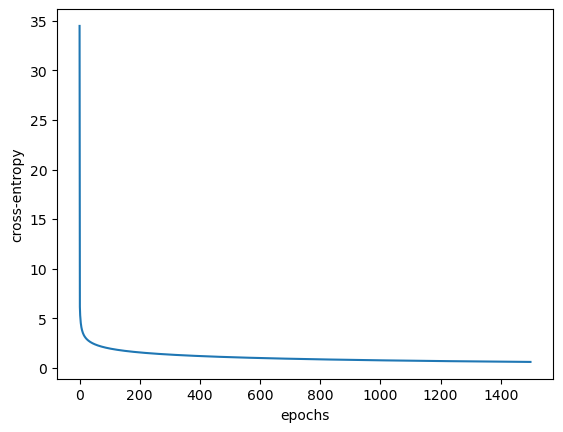

In [87]:
plt.figure(2)
plt.plot(range(1500), loss_list)
plt.xlabel('epochs')
plt.ylabel('cross-entropy')

Text(0, 0.5, 'Classification error')

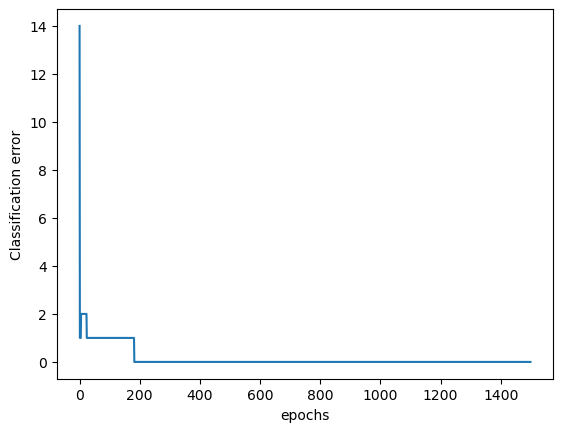

In [88]:
plt.figure(2)
plt.plot(range(1500), error_list)
plt.xlabel('epochs')
plt.ylabel('Classification error')

In [89]:
w_, b_ = model.w.numpy(), model.b.numpy()
ww, bb = np.zeros((3, 2)), np.zeros(3)


In [ ]:
for i in range(3):
    ww[i, :] = w_[:, i] - w_[:, (i+1)%3]
    bb[i] = b_[i] - b_[(i+1)%3]

# Q2

In [262]:
SEED = 100
torch.manual_seed(SEED)
np.random.seed(SEED)

In [263]:
iris = datasets.load_iris()
num_classes = 3
num_data = len(iris.target)

In [277]:
class Softmax_layer():
  def __init__(self, no_features, no_labels):
    self.w = torch.tensor(np.random.normal(0., 0.1, (no_features, no_labels)), dtype=torch.double)
    self.b = torch.tensor(0.1*np.random.rand(no_labels), dtype=torch.double)
    
  def __call__(self, x):
    u = torch.matmul(torch.tensor(x), self.w) + self.b
    p = torch.exp(u)/torch.sum(torch.exp(u), dim=1, keepdims=True)
    y = torch.argmax(p, dim=1)
    return u, p, y
        
def loss_f(target_label, pred_label, logits):
    entropy = -torch.sum(torch.log(logits)*target_label)
    # error = torch.sum(torch.not_equal(torch.argmax(target_label, dim=1), pred_label))
    
    return entropy
    
def train(model, inputs, target_label, learning_rate):
    u, p, y = model(inputs)
    grad_u = -(target_label-p)
    model.w -= learning_rate*torch.matmul(torch.transpose(torch.tensor(inputs), 0, 1), grad_u) 
    model.b -= learning_rate*torch.sum(grad_u, dim = 0) 
    
    return grad_u, torch.matmul(torch.transpose(torch.tensor(inputs), 0, 1), grad_u), torch.sum(grad_u, dim = 0) 
    

In [268]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris.target, test_size=0.4, random_state=2)

In [271]:
class MyDataset(Dataset):
  def __init__(self, X, y):
    self.X =torch.tensor(X, dtype=torch.double)
    self.y =torch.tensor(y)
    
  def __len__(self):
    return len(self.y)

  def __getitem__(self,idx):
    return self.X[idx], self.y[idx]

In [272]:
batch_size = 16
train_data = MyDataset(X_train, y_train)
test_data = MyDataset(X_test, y_test)

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [306]:
torch.mean(-torch.sum(torch.log(torch.softmax(logits, dim = 1))*K))/16

tensor(1.1343, dtype=torch.float64)

In [291]:
model = Softmax_layer(4,3)
loss_list = []
dd = []
for epoch in range(1000):
    loss = 0
    d_loss = 0
    size = len(train_dataloader.dataset)
    for batch, (X, y) in enumerate(train_dataloader):

        activation, logits, labels = model(X)
        

        K = np.zeros((len(y), 3)).astype(float)
        for p in range(len(y)):
            K[p,y[p]] = 1

        losss = loss_f(torch.tensor(K), labels, logits)

        loss_fn = nn.CrossEntropyLoss()
        train_loss = loss_fn( logits ,torch.tensor(K))
        break
        # print(train_loss, a) 
        
        grad_u, grad_w, grad_b = train(model, torch.tensor(X), torch.tensor(K), 0.1)
        loss += train_loss
        d_loss += losss
    loss_list.append(loss/size)    
    dd.append(d_loss/size) 
    if epoch%100 == 99:
        print('epoch:{}, loss:{}'.format(epoch+1,loss_list[epoch]))
        print('SSepoch:{}, loss:{}'.format(epoch+1,dd[epoch]))

C:\Users\micha\AppData\Local\Temp\ipykernel_11756\2743265143.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  u = torch.matmul(torch.tensor(x), self.w) + self.b


epoch:100, loss:0.0
SSepoch:100, loss:0.0
epoch:200, loss:0.0
SSepoch:200, loss:0.0
epoch:300, loss:0.0
SSepoch:300, loss:0.0
epoch:400, loss:0.0
SSepoch:400, loss:0.0
epoch:500, loss:0.0
SSepoch:500, loss:0.0
epoch:600, loss:0.0
SSepoch:600, loss:0.0
epoch:700, loss:0.0
SSepoch:700, loss:0.0
epoch:800, loss:0.0
SSepoch:800, loss:0.0
epoch:900, loss:0.0
SSepoch:900, loss:0.0
epoch:1000, loss:0.0
SSepoch:1000, loss:0.0
